<a href="https://colab.research.google.com/github/souvik25162/ArimaAnnHybrid/blob/master/ARIMA_LSTM%20sweden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install statsmodels --upgrade

  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler,StandardScaler
plt.style.use('fivethirtyeight')

In [4]:
from google.colab import files
uploaded=files.upload()
df=pd.read_csv('sweden.csv')
df.rename(columns={'LRHUTTTTSEM156S':'values'},inplace=True)
df.head()

Saving sweden.csv to sweden.csv


,DATE,values
0,1983-01-01,3.4
1,1983-02-01,3.7
2,1983-03-01,3.7
3,1983-04-01,3.4
4,1983-05-01,3.7


Text(0.5, 0, 'date')

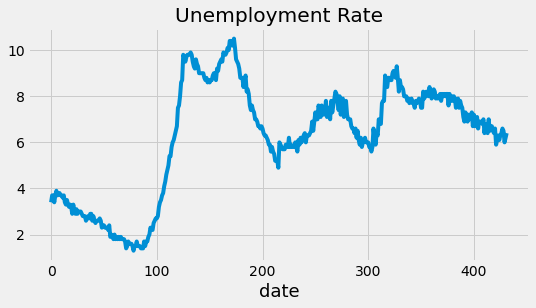

In [5]:
plt.figure(figsize=(8,4))
plt.title("Unemployment Rate")
plt.plot(df['values'])
plt.xlabel('date',fontsize=18)

In [6]:
data=df.filter(['values'])

In [7]:
dataset=data.values

In [8]:
import math
training_datalen=396
print(training_datalen)

396


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [10]:
train_data= scaled_data[0:396,:]
time_step=15
test_data= scaled_data[training_datalen-15:,:]

In [11]:
len(test_data)

51

In [12]:
x_train=[]
y_train=[]
for i in range(time_step,len(train_data)):
  x_train.append(train_data[i-15:i,0])
  y_train.append(train_data[i,0])
  if i<=time_step:
    print(x_train)
    print(y_train)
    print()

[array([0.22826087, 0.26086957, 0.26086957, 0.22826087, 0.26086957,
       0.2826087 , 0.26086957, 0.27173913, 0.27173913, 0.26086957,
       0.26086957, 0.25      , 0.26086957, 0.22826087, 0.2173913 ])]
[0.2391304347826087]



In [13]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [14]:
x_train.shape

(381, 15)

In [15]:
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [16]:
x_train.shape

(381, 15, 1)

In [17]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [18]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [19]:
model.fit(x_train,y_train,batch_size=1,epochs=10)

Epoch 1/10
381/381 [==============================] - 6s 7ms/step - loss: 0.0285
Epoch 2/10
381/381 [==============================] - 3s 7ms/step - loss: 0.0048
Epoch 3/10
381/381 [==============================] - 3s 7ms/step - loss: 0.0018
Epoch 4/10
381/381 [==============================] - 3s 7ms/step - loss: 0.0015
Epoch 5/10
381/381 [==============================] - 3s 7ms/step - loss: 0.0012
Epoch 6/10
381/381 [==============================] - 3s 7ms/step - loss: 0.0021
Epoch 7/10
381/381 [==============================] - 3s 7ms/step - loss: 0.0016
Epoch 8/10
381/381 [==============================] - 3s 7ms/step - loss: 0.0012
Epoch 9/10
381/381 [==============================] - 3s 7ms/step - loss: 0.0014
Epoch 10/10
381/381 [==============================] - 3s 7ms/step - loss: 0.0011


In [20]:
x_test=[]
y_test= dataset[training_datalen:,:]
for i in range(15,len(test_data)):
  x_test.append(test_data[i-15:i,0])

In [21]:
x_test=np.array(x_test)

In [22]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [23]:
pred= model.predict(x_test)
pred1=scaler.inverse_transform(pred)

In [24]:
len(pred1)

36

In [25]:
rmse=np.sqrt(np.mean(pred1-y_test)**2)

In [26]:
print(rmse)

0.2747232331169976


In [27]:
train= data[:training_datalen]
valid=data[training_datalen:]
valid['pred1']=pred1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


No handles with labels found to put in legend.


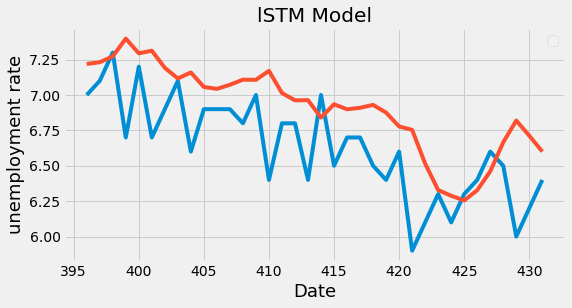

In [28]:
plt.figure(figsize=(8,4))
plt.title("lSTM Model")
plt.xlabel("Date",fontsize=18)
plt.ylabel("unemployment rate",fontsize=18)
plt.plot(valid[['values','pred1']])
plt.legend()
plt.show()

#ARIMA

In [29]:
ts=df['values']
train=ts[0:396]
test= ts[396:len(ts)]

In [30]:
len(test)

36

In [31]:
train=train.values
test=test.values

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


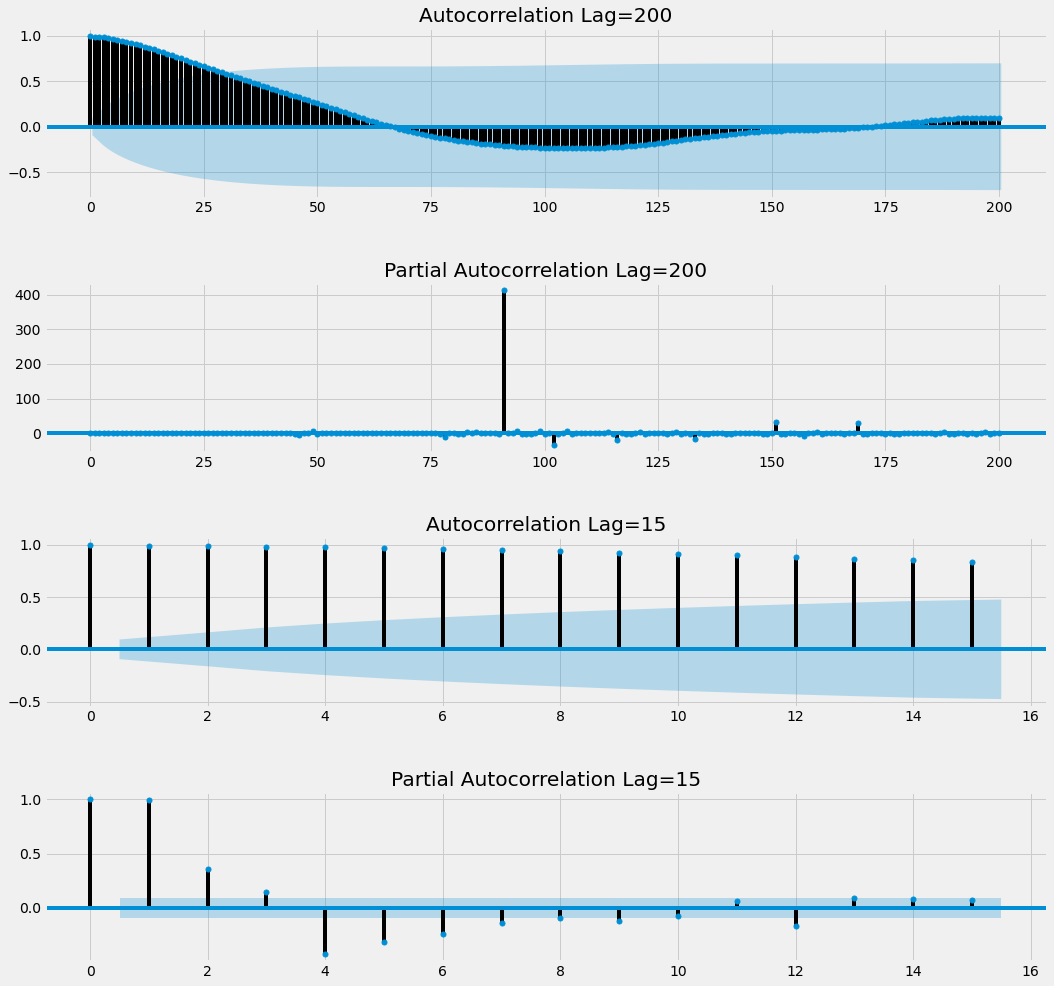

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(411)
fig = plot_acf(df['values'],lags=200,ax=ax1)
plt.title('Autocorrelation Lag=200')
ax2 = fig.add_subplot(412)
fig = plot_pacf(df['values'],lags=200,ax=ax2)
plt.title('Partial Autocorrelation Lag=200')
ax3 = fig.add_subplot(413)
fig = plot_acf(df['values'],lags=15,ax=ax3)
plt.title('Autocorrelation Lag=15')
ax4 = fig.add_subplot(414)
fig = plot_pacf(df['values'],lags=15,ax=ax4)
plt.title('Partial Autocorrelation Lag=15')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=0.5)
plt.show()

In [33]:
from statsmodels.tsa.stattools import adfuller,acf,pacf

def test_stationarity(series,mlag =None, lag = None,):
    print('ADF Test Result')
    res = adfuller(series, maxlag = mlag, autolag = lag)
    output = pd.Series(res[0:4],index = ['Test Statistic', 'p value', 'used lag', 'Number of observations used'])
    for key, value in res[4].items():
        output['Critical Value ' + key] = value
    print(output)

In [34]:
test_stationarity(df['values'])

ADF Test Result
Test Statistic                  -2.174699
p value                          0.215556
used lag                        18.000000
Number of observations used    413.000000
Critical Value 1%               -3.446283
Critical Value 5%               -2.868564
Critical Value 10%              -2.570511
dtype: float64


In [35]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

In [36]:
history=[x for x in train]
predictions=list()

for t in range(len(test)):
  model=ARIMA(history,order=(1,1,2))
  model_fit=model.fit(disp=0)
  output=model_fit.forecast()
  yhat=output[0]
  predictions.append(yhat)
  obs=test[t]
  history.append(obs)
  print('predicted=%f, expected=%f'%(yhat,obs))

predicted=7.035359, expected=7.000000
predicted=7.007022, expected=7.100000
predicted=7.050749, expected=7.300000
predicted=7.202132, expected=6.700000
predicted=6.950597, expected=7.200000
predicted=7.061800, expected=6.700000
predicted=6.859244, expected=6.900000
predicted=6.837023, expected=7.100000
predicted=6.954498, expected=6.600000
predicted=6.759035, expected=6.900000
predicted=6.796692, expected=6.900000
predicted=6.838675, expected=6.900000
predicted=6.874371, expected=6.800000
predicted=6.842056, expected=7.000000
predicted=6.931978, expected=6.400000
predicted=6.651451, expected=6.800000
predicted=6.681302, expected=6.800000
predicted=6.721634, expected=6.400000
predicted=6.532801, expected=7.000000
predicted=6.745248, expected=6.500000
predicted=6.629645, expected=6.700000
predicted=6.654708, expected=6.700000
predicted=6.678369, expected=6.500000
predicted=6.584168, expected=6.400000
predicted=6.460816, expected=6.600000
predicted=6.495454, expected=5.900000
predicted=6.

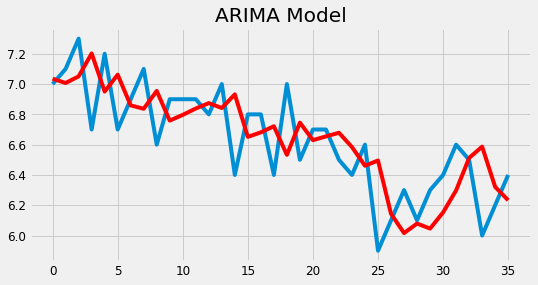

In [37]:
plt.figure(figsize=(8,4))
plt.title("ARIMA Model")
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

ERROR FOR ARIMA

In [38]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test,predictions)
print("MSE:",error)

print("RMSE:",np.sqrt(error))

MSE: 0.07258637031109991
RMSE: 0.2694185782589981


#HYBRID # ARIMA-LSTM


In [40]:
NEW_PREDICTION= (pred1+predictions)/2

In [41]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test,NEW_PREDICTION)
print("MSE:",error)

print("RMSE:",np.sqrt(error))

MSE: 0.0907918945744163
RMSE: 0.3013169337664518
